### Author : Anup Patel (M.tech CSA) 

### Library Import 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Read File 

In [2]:
data=pd.read_csv("./../data/04_cricket_1999to2011.csv")

In [3]:
data.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,...,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,...,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,...,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,...,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,...,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,...,0,0,1,0,0,1,0,0,0,1


In [4]:
print("No. of Columns: " +str(len(data.columns)))

No. of Columns: 38


In [5]:
print("No. of Data Instances: " +str(len(data)))

No. of Data Instances: 126768


### Feature Extraction 

In [6]:
innings = data['Innings'].values
overs_completed = data['Over'].values
total_overs = data['Total.Overs'].values
overs_remaining = total_overs - overs_completed
innings_total_score = data['Innings.Total.Runs'].values
current_score = data['Total.Runs'].values
runs_remaining = innings_total_score - current_score
wickets_remaining = data['Wickets.in.Hand'].values
print("Features Extracted \n")

Features Extracted 



### Squared Error Loss Function 

In [7]:
def squared_error_loss(params, args):
    squared_loss = []
    L = params[10]
    innings=args[0]
    overs_remaining = args[1]
    runs_remaining = args[2]
    wickets_remaining = args[3]
    loss=0   
    #count=0
    
    for i in range(len(wickets_remaining)):
        if innings[i] == 1:
            if (runs_remaining[i] > 0 and wickets_remaining[i]>0):
                predicted_run = params[wickets_remaining[i]-1] * (1.0 - np.exp((-1*L*overs_remaining[i])/(params[wickets_remaining[i]-1])))
                tmp=(predicted_run - runs_remaining[i])**2
                loss=loss+tmp
                #count+=1
    #print(count) 
    return loss

### Optimization Function

In [8]:
def optimizer(method_name,innings,overs_remaining,runs_remaining,wickets_remaining):    
    #BFGS Method

    initial_parameters = [10.0, 20.0, 35.0, 50.0, 70.0, 100.0, 140.0, 180.0, 235.0,280.0, 19] #Random Values

    #Minimize Loss function and find optimized Parameters
    parameters = minimize(squared_error_loss, initial_parameters,
                      args=[innings,
                            overs_remaining,
                            runs_remaining,
                            wickets_remaining
                            ],
                      method=method_name)
    optimized_params1, squared_error_loss1 = parameters['x'], parameters['fun']
    #print(optimized_params1)
    #print(squared_error_loss1)
    return parameters['x'], parameters['fun']


### Optimization 

In [9]:
print("Optimizing Parameters .... ")
optimized_params, squared_error_loss= optimizer('L-BFGS-B',innings,overs_remaining,runs_remaining,wickets_remaining)
print("Optimized Parameters Computed")
#optimizer('Powell')
#optimizer('L-BFGS-B')
#optimizer('TNC')
#optimizer('COBYLA')

#Got least Loss by using BFGS Method

Optimizing Parameters .... 
Optimized Parameters Computed


### Loss and Parameters 

In [12]:
print ('Total Squared Error Loss = ' + str(squared_error_loss))
print ('Parameter L :: ' + str(optimized_params[10]))
for i in range(10):
    print ('Parameter Z' + str(i+1) + ' = ' + str(optimized_params[i]))

Total Squared Error Loss = 104818097.3553355
Parameter L :: 10.891098082326382
Parameter Z1 = 13.496367065719378
Parameter Z2 = 27.415347389897747
Parameter Z3 = 51.20174965647599
Parameter Z4 = 78.77429522669443
Parameter Z5 = 104.05603141296247
Parameter Z6 = 137.75674727942007
Parameter Z7 = 168.78289371646494
Parameter Z8 = 207.4873252009579
Parameter Z9 = 239.02889664145187
Parameter Z10 = 284.05111670458524


### Compute RMSE

In [13]:
print("Root Mean Squared Error :: " + str(np.sqrt(squared_error_loss/len(overs_remaining))))

Root Mean Squared Error :: 28.754996349478063


### Prediction Function 

In [14]:
def prediction_func(z, l, u):
    return z * (1 - np.exp(-l*u/z))
"""
z=parameter
u=overs remaining
"""

'\nz=parameter\nu=overs remaining\n'

### Visualisation 

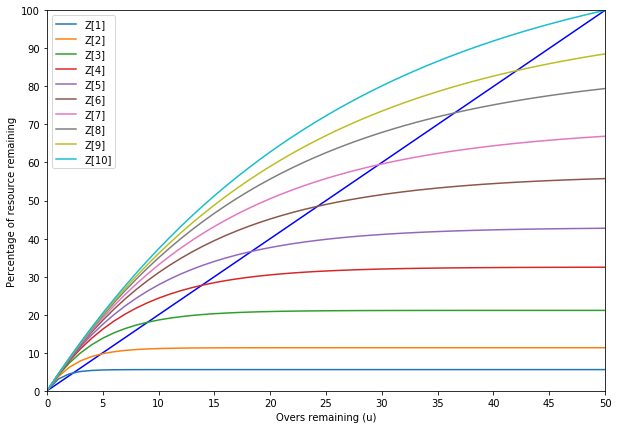

Plot Generated Successfully and saved in folder


In [22]:
# Plot the resource vs overs used graphs for 10 parameters
plt.figure(figsize=(10,7)) #Fig Size
plt.xlabel('Overs remaining (u)')
plt.ylabel('Percentage of resource remaining')
plt.xlim((0, 50))
plt.ylim((0, 100))
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
max_resource = prediction_func(optimized_params[9], optimized_params[10], 50)
overs = np.arange(0, 51, 1)
line=[]

#For Center Line
for i in range(len(overs)):
    line.append(2*i)
plt.plot(overs, line, color='blue')

#Plot Resources Remaining vs overs Remaining
for i in range(10):
    fraction= prediction_func(optimized_params[i], optimized_params[10], overs)/max_resource
    y=100*fraction
    plt.plot(overs, y, label='Z['+str(i+1)+']')
    plt.legend()
plt.show()
print("Plot Generated Successfully and saved in folder")
#plt.savefig('plot.png')

